In [1]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


## EPS table lookup algo

1. Choose a row from the table. 
2. With the input, do binary tree search in the row, find the position i where key_table_row[i] < input and key_table_row[i+1] >= input
3. Set output to:
```
value_table_row[i] + (input - key_table_row[i]) * (value_table_row[i+1] - value_table_row[i]) / (key_table_row[i+1] - key_table_row[i])
```


## CAN 0xe4 torque processing by math and lookup tables (Civic sedan)

### Step 1: Mutipled by sqrt(3)
```
can_e4_torque = can_e4_torque * sqrt(3)
```

### Step 2: Scaled down to 1/4 and clamped to [-0x6ee, 0x6ee]
```
can_e4_torque = can_e4_torque << 2
can_e4_torque = clamp(can_e4_torque, -0x6ee, 0x6ee)
```

### Step 3: Mutiplication using 3 tables (TODO, missing a table data)
```
w1 = ?
w2 = ?
v1 = table_1_lookup()
v2 = table_2_lookup()
v3 = w1 * v1 + w2 * v2
v4 = table_3_lookup()
multiplier = v4 * (v3 >> 0xe)
can_e4_torque = multiplier * can_e4_torque
```

### Step 4: Final torque curve

In [29]:
# Input: the abs of can_e4_torque.
# Output range: see the value_table.

# started at address 0x1371c

key_table = [
    0x0, 0xDE, 0x14D, 0x1EF, 0x290, 0x377, 0x454, 0x610, 0x6EE,
    0x0, 0xDE, 0x14D, 0x1EF, 0x290, 0x377, 0x454, 0x610, 0x6EE,
    0x0, 0xDE, 0x14D, 0x1EF, 0x290, 0x377, 0x454, 0x610, 0x6EE,
    0x0, 0xDE, 0x14D, 0x1EF, 0x290, 0x377, 0x454, 0x610, 0x6EE,
    0x0, 0xDE, 0x14D, 0x1EF, 0x290, 0x377, 0x454, 0x610, 0x6EE,
    0x0, 0xDE, 0x14D, 0x1EF, 0x290, 0x377, 0x454, 0x610, 0x6EE,     
    0x0, 0xDE, 0x1BB, 0x299, 0x377, 0x455, 0x532, 0x610, 0x6EE
]

# started at address 0x1379a)
value_table = [
  0x0,   0x917, 0xDC5,  0x1017,  0x119F,  0x140B,  0x1680,  0x1680, 0x1680,
  0x0,   0x917, 0xDC5,  0x1017,  0x119F,  0x140B,  0x1680,  0x1680,  0x1680,
  0x0,   0x917, 0xDC5,  0x1017,  0x119F,  0x140B,  0x1680,  0x1680,  0x1680,
  0x0,   0x917, 0xDC5,  0x1017,  0x119F,  0x140B,  0x1680,  0x1680,  0x1680,
  0x0,   0x917, 0xDC5,  0x1017,  0x119F,  0x140B,  0x1680,  0x1680,  0x1680,
  0x0,   0x917, 0xDC5,  0x1017,  0x119F,  0x140B,  0x1680,  0x1680,  0x1680,
  0x0,   0x6B3, 0xB1A,  0xCCD,   0xE9A,   0x104D,  0x119A,  0x11DA,  0x11DA
]



Text(0.5, 1.0, 'Torque Value table')

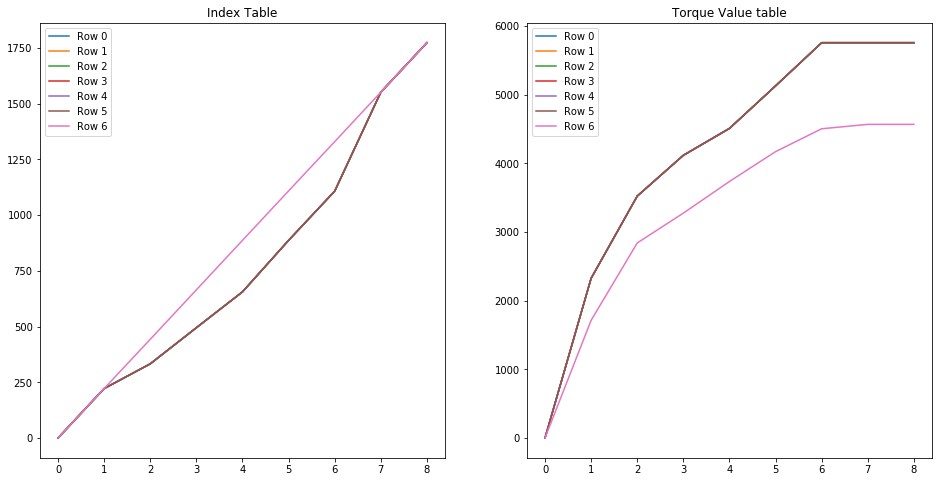

In [17]:
figsize(16,8)
plt.subplot(1, 2, 1)
for i in range(0, 63, 9):
  plot(key_table[i:i+9], label='Row %d' % (i//9) )
plt.legend()
plt.title("Key Table")
plt.subplot(1, 2, 2)
for i in range(0, 63, 9):
  plot(value_table[i:i+9], label='Row %d' % (i//9) )
plt.legend()
plt.title("Torque Value table")


### Table modificiation

Text(0.5, 1.0, 'New table')

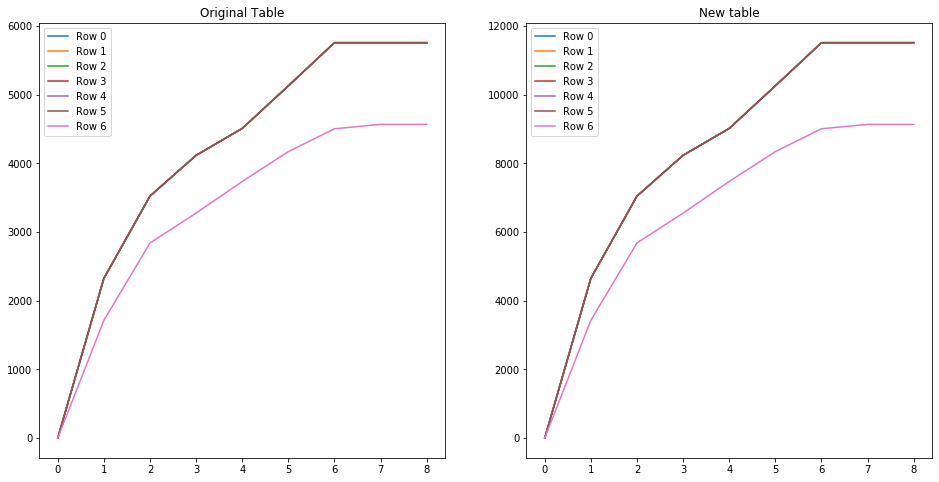

In [20]:
# 2X
modified_value_table = [x * 2 for x in value_table]
plt.subplot(1, 2, 1)
for i in range(0, 63, 9):
  plot(value_table[i:i+9], label='Row %d' % (i//9) )
plt.legend()
plt.title("Original Table")
plt.subplot(1, 2, 2)
for i in range(0, 63, 9):
  plot(modified_value_table[i:i+9], label='Row %d' % (i//9) )
plt.legend()
plt.title("New table")


[   0 2327 3525 4119 4511 5131 5760 5760 5760    0 2327 3525 4119 4511
 5131 5760 5760 5760    0 2327 3525 4119 4511 5131 5760 5760 5760    0
 2327 3525 4119 4511 5131 5760 5760 5760    0 2327 3525 4119 4511 5131
 5760 5760 5760    0 2327 3525 4119 4511 5131 5760 5760 5760    0 1715
 2842 3277 3738 4173 4506 4570 4570]


Text(0.5, 1.0, 'New table')

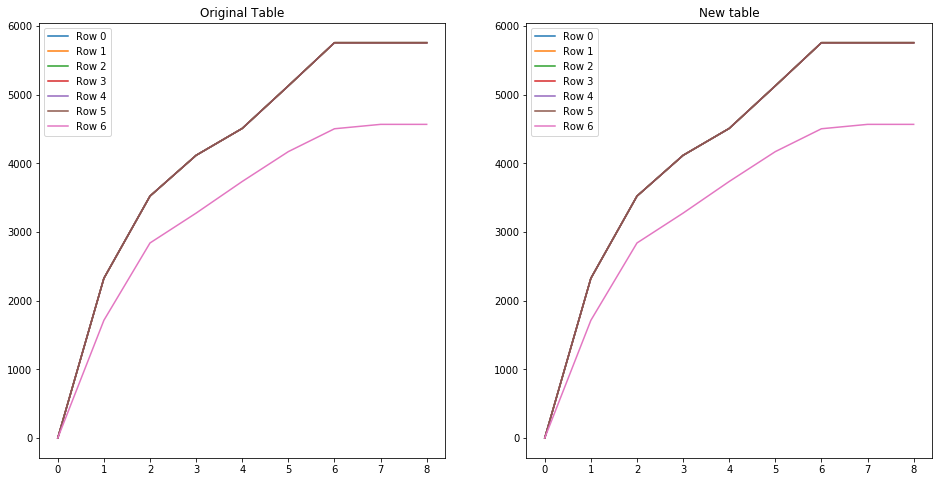

In [28]:
import numpy as np

# Non uniform scale
scales = np.array([1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])
assert len(scales) == 9, 'Should be 9!!!'

new_table = np.array(value_table) * np.tile(scales, 7).astype(int)
print(new_table)
plt.subplot(1, 2, 1)
for i in range(0, 63, 9):
  plot(value_table[i:i+9], label='Row %d' % (i//9) )
plt.legend()
plt.title("Original Table")
plt.subplot(1, 2, 2)
for i in range(0, 63, 9):
  plot(new_table[i:i+9], label='Row %d' % (i//9) )
plt.legend()
plt.title("New table")


In [55]:
import csv

csv_path = '/home/nanami/data/honda_civic_touring_2016_can_stock.csv'

with open(csv_path) as f:
  lines = csv.reader(f, delimiter=',')
  lines = list(lines)
  titles = lines[1]
  print(lines[0])
  # 128:e4
  steering_control_frames = []
  # 0:18f
  steering_status_frames = []
  for l in lines[1:]:
    if int(l[1]) == 0xe4 and int(l[2]) == 128:
      e4_torque = int(l[3][:4], 16)
      if e4_torque > 0x7FFF:
        e4_torque -= 0x10000
      steering_control_frames.append( (float(l[0]), e4_torque,  l[3]) )
    if int(l[1]) == 0x18f and int(l[2]) == 0:
      sensor_val = int(l[3][:4], 16)
      if sensor_val > 0x7FFF:
        sensor_val -= 0x10000
      steering_status_frames.append( (float(l[0]), sensor_val,  l[3]) )
for v in steering_status_frames:
    if v[1] < -1000:
        print(v[1], v[2])
    

['time', 'addr', 'bus', 'data']


In [ ]:
TODO: Table lookup code compilation
TODO: EPS emulator